#라이브러리 import

In [ ]:
#패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore') #warning 문구 제거
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기 > 원본 코드에서 path만 수정

path = '/content/drive/MyDrive/Colab Notebooks/BOAZ/미니 플젝/data/원천데이터'
#path = '/content/drive/MyDrive/BOAZ/미니 플젝'

# encoding은 본인 OS에 맞게 수정해주세요!
encoding = 'UTF-8' # macos인 경우
# encoding = 'cp949' # 윈도우인 경우

try:
    visit_area_info = pd.read_csv(path+'/TS_csv/tn_visit_area_info_방문지정보_D.csv', encoding=encoding)
    travel = pd.read_csv(path+'/TS_csv/tn_travel_여행_D.csv', encoding=encoding)
    traveller_master = pd.read_csv(path+'/TS_csv/tn_traveller_master_여행객 Master_D.csv', encoding=encoding)
except UnicodeDecodeError:
    print("UnicodeDecodeError: Unable to read the file with automatic encoding detection.")


# 전처리

## 1) visit_area_info 방문지 정보 df

In [ ]:
# 관광지 선택
visit_area_info = visit_area_info[ (visit_area_info['VISIT_AREA_TYPE_CD'] == 1) |
                                  (visit_area_info['VISIT_AREA_TYPE_CD'] == 2) |
           (visit_area_info['VISIT_AREA_TYPE_CD'] == 3) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 4) |
           (visit_area_info['VISIT_AREA_TYPE_CD'] == 5) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 6) |
            (visit_area_info['VISIT_AREA_TYPE_CD'] == 7) | (visit_area_info['VISIT_AREA_TYPE_CD'] == 8)]

1-자연관광지


2-역사/유적/종교 시설 (문화재, 박물관, 촬영지, 절 등)


3-문화시설(공연장, 영화관, 전시관 등)


4-상업지구(거리, 시장, 쇼핑시설)


5-레저/스포츠 관련 시설(스키, 카트, 수상레저)


6-테마시설(놀이공원, 워터파크)


7-산책로, 둘레길 등


8-지역축제, 행사에 해당하는 방문지



In [ ]:

#인덱스 재정렬
visit_area_info = visit_area_info.reset_index(drop = True)

In [ ]:
visit_area_info

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,ROAD_NM_CD,LOTNO_CD,POI_ID,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2210300003,a_a008632,7,송도센트럴파크,2022-10-30,2022-10-30,NaN,인천 연수구 송도동 24-5,126.63863,37.393064,NaN,NaN,POI01000000BVPPZF,스트롤링가든브릿지,120.0,1,N,1.0,NaN,4.0,5.0,4.0,NaN
1,2210220007,d_d004269,11,원앙폭포,2022-10-22,2022-10-22,제주특별자치도 서귀포시 돈내코로 137,제주특별자치도 서귀포시 상효동 1463,126.58133,33.300177,NaN,NaN,NaN,NaN,30.0,1,N,9.0,NaN,3.0,2.0,3.0,NaN
2,2210120005,d_d005276,19,광치기해변,2022-10-12,2022-10-12,NaN,제주특별자치도 서귀포시 성산읍 고성리 224-33,126.923897,33.452317,NaN,NaN,NaN,NaN,30.0,1,N,9.0,NaN,4.0,3.0,3.0,NaN
3,2211100002,d_d012453,2,소천지,2022-11-10,2022-11-10,NaN,제주특별자치도 서귀포시 보목동,126.591265,33.239076,NaN,NaN,NaN,NaN,30.0,1,N,5.0,NaN,5.0,5.0,5.0,NaN
4,2209070004,c_c000751,11,쏠비치진도 인피니티풀,2022-09-07,2022-09-07,전남 진도군 의신면 송군길 30-40,전남 진도군 의신면 초사리 1204,126.327957,34.400734,NaN,NaN,NaN,NaN,480.0,6,N,5.0,NaN,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17074,2210120001,d_d002998,18,성산일출봉,2022-10-12,2022-10-12,NaN,제주특별자치도 서귀포시 성산읍 성산리 78,126.9405375,33.45913497,NaN,NaN,NaN,NaN,90.0,1,Y,4.0,NaN,4.0,4.0,4.0,NaN
17075,2210300003,d_d005087,13,협재해수욕장,2022-10-30,2022-10-30,제주특별자치도 제주시 한림읍 한림로 329-10,제주특별자치도 제주시 한림읍 협재리 2447,126.2391575,33.39386608,NaN,NaN,POI010000006VSVBV,협재회관,30.0,1,Y,4.0,NaN,4.0,4.0,4.0,NaN
17076,2210250003,d_d002090,18,산굼부리,2022-10-25,2022-10-25,NaN,제주특별자치도 제주시 조천읍 교래리 166-2,126.693832,33.43257409,NaN,NaN,NaN,NaN,30.0,2,N,2.0,NaN,5.0,5.0,5.0,NaN
17077,2208220004,c_c000128,7,여수해상케이블카,2022-08-22,2022-08-22,전남 여수시 돌산읍 돌산로 3600-1,전남 여수시 돌산읍 우두리 794-89,127.741531,34.73059148,NaN,,POI01000000BSBRXY,여수해상케이블카놀아정류장,30.0,6,N,1.0,NaN,4.0,4.0,4.0,NaN


In [ ]:
#제대로 추출되었는지 확인
visit_area_info['VISIT_AREA_TYPE_CD'].unique()

array([1, 6, 2, 4, 3, 7, 5, 8])

In [ ]:
visit_area_info.dropna(subset = ['LOTNO_ADDR'], inplace = True)
visit_area_info = visit_area_info.reset_index(drop = True)

In [ ]:
# 시도/군구 변수 생성
sido = []
gungu = []
eupmyeon = []
for i in range(len(visit_area_info['LOTNO_ADDR'])):
    sido.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[0])
    gungu.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[1])
    eupmyeon.append(visit_area_info['LOTNO_ADDR'][i].split(' ')[2])

In [ ]:
visit_area_info['SIDO'] = sido
visit_area_info['GUNGU'] = gungu
visit_area_info['EUPMYEON'] = eupmyeon

### 변수 선택

TRAVEL_ID 여행 ID

VISIT_AREA_ID 방문장소 ID

VISIT_AREA_NM 방문 장소 이름

SIDO 시/도

GUNGU 군/구

VISIT_AREA_TYPE_CD 관광 장소 유형

DGSTFN 만족도

<s>REVISIT_INTENTION 재방문의향</s>

<s>RCMDTN_INTENTION 추천의향</s>

<s>RESIDENCE_TIME_MIN 체류시간분</s>

<s>REVISIT_YN 재방문여부</s>

In [ ]:
visit_area_info

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,ROAD_NM_CD,LOTNO_CD,POI_ID,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD,SIDO,GUNGU,EUPMYEON
0,2210300003,a_a008632,7,송도센트럴파크,2022-10-30,2022-10-30,NaN,인천 연수구 송도동 24-5,126.63863,37.393064,NaN,NaN,POI01000000BVPPZF,스트롤링가든브릿지,120.0,1,N,1.0,NaN,4.0,5.0,4.0,NaN,인천,연수구,송도동
1,2210220007,d_d004269,11,원앙폭포,2022-10-22,2022-10-22,제주특별자치도 서귀포시 돈내코로 137,제주특별자치도 서귀포시 상효동 1463,126.58133,33.300177,NaN,NaN,NaN,NaN,30.0,1,N,9.0,NaN,3.0,2.0,3.0,NaN,제주특별자치도,서귀포시,상효동
2,2210120005,d_d005276,19,광치기해변,2022-10-12,2022-10-12,NaN,제주특별자치도 서귀포시 성산읍 고성리 224-33,126.923897,33.452317,NaN,NaN,NaN,NaN,30.0,1,N,9.0,NaN,4.0,3.0,3.0,NaN,제주특별자치도,서귀포시,성산읍
3,2211100002,d_d012453,2,소천지,2022-11-10,2022-11-10,NaN,제주특별자치도 서귀포시 보목동,126.591265,33.239076,NaN,NaN,NaN,NaN,30.0,1,N,5.0,NaN,5.0,5.0,5.0,NaN,제주특별자치도,서귀포시,보목동
4,2209070004,c_c000751,11,쏠비치진도 인피니티풀,2022-09-07,2022-09-07,전남 진도군 의신면 송군길 30-40,전남 진도군 의신면 초사리 1204,126.327957,34.400734,NaN,NaN,NaN,NaN,480.0,6,N,5.0,NaN,5.0,5.0,5.0,NaN,전남,진도군,의신면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,2211040001,d_d011086,17,서문공설시장,2022-11-04,2022-11-04,제주특별자치도 제주시 서문로4길 13-2,제주특별자치도 제주시 용담1동 135-9,126.5179076,33.51136992,NaN,NaN,POI01000000BZ1AN4,서문공설시장,30.0,4,N,6.0,NaN,2.0,2.0,2.0,NaN,제주특별자치도,제주시,용담1동
15986,2210120001,d_d002998,18,성산일출봉,2022-10-12,2022-10-12,NaN,제주특별자치도 서귀포시 성산읍 성산리 78,126.9405375,33.45913497,NaN,NaN,NaN,NaN,90.0,1,Y,4.0,NaN,4.0,4.0,4.0,NaN,제주특별자치도,서귀포시,성산읍
15987,2210300003,d_d005087,13,협재해수욕장,2022-10-30,2022-10-30,제주특별자치도 제주시 한림읍 한림로 329-10,제주특별자치도 제주시 한림읍 협재리 2447,126.2391575,33.39386608,NaN,NaN,POI010000006VSVBV,협재회관,30.0,1,Y,4.0,NaN,4.0,4.0,4.0,NaN,제주특별자치도,제주시,한림읍
15988,2210250003,d_d002090,18,산굼부리,2022-10-25,2022-10-25,NaN,제주특별자치도 제주시 조천읍 교래리 166-2,126.693832,33.43257409,NaN,NaN,NaN,NaN,30.0,2,N,2.0,NaN,5.0,5.0,5.0,NaN,제주특별자치도,제주시,조천읍


In [ ]:
visit_area_info = visit_area_info[['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'SIDO', 'GUNGU', 'EUPMYEON', 'VISIT_AREA_TYPE_CD', 'DGSTFN','X_COORD','Y_COORD']]

In [ ]:
visit_area_info['TRAVEL_ID'].value_counts()

d_d001934    23
d_d006232    22
d_d000326    19
d_d006711    19
d_d002701    18
             ..
d_d000068     1
d_d003172     1
d_d004450     1
d_d004993     1
d_d012273     1
Name: TRAVEL_ID, Length: 3736, dtype: int64

In [ ]:
visit_area_info[visit_area_info['TRAVEL_ID'] == 'd_d001934' ]

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD
259,d_d001934,2210040001,오설록티뮤지엄,제주특별자치도,서귀포시,안덕면,3,5.0,126.289489,33.305913
781,d_d001934,2209300009,광치기해변,제주특별자치도,서귀포시,성산읍,1,5.0,126.923897,33.452317
1478,d_d001934,2210050001,용연계곡,제주특별자치도,제주시,용담일동,2,5.0,126.514431,33.512765
3229,d_d001934,2209290006,코난해변,제주특별자치도,제주시,구좌읍,1,5.0,126.811202,33.557455
3970,d_d001934,2210020001,한림공원,제주특별자치도,제주시,한림읍,1,5.0,126.240185,33.38919
4329,d_d001934,2210040002,한림민속5일시장,제주특별자치도,제주시,한림읍,4,5.0,126.274163,33.420186
4357,d_d001934,2210030002,한라산국립공원 관음사지구안내소,제주특별자치도,제주시,오등동,1,5.0,126.549731,33.421604
5608,d_d001934,2210020006,산방산탄산온천,제주특별자치도,서귀포시,안덕면,6,5.0,126.298782,33.249027
5625,d_d001934,2209290007,고흐의정원,제주특별자치도,서귀포시,성산읍,3,5.0,126.843718,33.373376
6479,d_d001934,2210010009,서귀포매일올레시장,제주특별자치도,서귀포시,서귀동,4,5.0,126.563232,33.25015


In [ ]:
visit_area_info[visit_area_info['TRAVEL_ID'] == 'd_d012273' ]

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD
15945,d_d012273,2211110004,제주항공우주박물관,제주특별자치도,서귀포시,안덕면,2,2.0,126.2996871,33.3042428


In [ ]:
visit_area_info['SIDO'].value_counts()

제주특별자치도    13281
인천           819
경남           639
전남           538
경북           238
충남           179
경기           101
전북            66
서울            57
부산            22
강원            14
경상남도           9
인천광역시          8
대구             6
경상북도           4
전라남도           3
광주             2
울산             2
충북             2
Name: SIDO, dtype: int64

## 2) travel 여행 정보 df

In [ ]:
travel.head()

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK
0,b_b010312,D02,b010312,1;21;22;24;27;,2022-10-29,2022-10-31,대중교통 등,NaN,1;21;22;24;27;,21;22;26
1,b_b005266,D02,b005266,21;22;23;24;26;,2022-10-12,2022-10-14,자가용,NaN,21;22;23;24;26;,12;22;3
2,d_d000296,D01,d000296,2;,2022-08-18,2022-08-22,대중교통 등,40세 이상 자녀 동반 여행,2;,2;28;12
3,d_d002565,D01,d002565,22;23;,2022-10-29,2022-11-01,자가용,NaN,22;23;,22;23;2
4,d_d006390,D01,d006390,2;22;4;5;6;,2022-10-15,2022-10-19,대중교통 등,39세 이하 3인 이상 친구,2;22;4;5;6;,5;22;6


### 변수 선택

TRAVEL_ID: 여행 ID

TRAVELER_ID: 여행자 ID

MVMN_NM: 주요 이동수단

In [ ]:
travel = travel[['TRAVEL_ID', 'TRAVELER_ID', 'MVMN_NM']]

travel.head()

,TRAVEL_ID,TRAVELER_ID,MVMN_NM
0,b_b010312,b010312,대중교통 등
1,b_b005266,b005266,자가용
2,d_d000296,d000296,대중교통 등
3,d_d002565,d002565,자가용
4,d_d006390,d006390,대중교통 등


In [ ]:
# 결측값 확인
missing_values = travel.isnull().sum()
print(missing_values)

TRAVEL_ID        0
TRAVELER_ID      0
MVMN_NM        137
dtype: int64


In [ ]:
# 결측값 대체 >> 자가용으로 채웠음
travel['MVMN_NM'].fillna('자가용', inplace=True)

## 3) traveller_master 여행자 정보 df

### 변수 선택

TRAVELER_ID 여행객ID

GENDER 성별

AGE_GRP 연령대

INCOME 소득

TRAVEL_STYL(1,4,5,6,8) 여행 스타일

TRAVEL_MOVTIVE(1) 여행 동기 - 2,3은 결측치가 있어 제외

TRAVEL_COMPANIONS_NUM 동반자 수


In [ ]:
traveller_master = traveller_master[['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1',
                                     'TRAVEL_STYL_4', 'TRAVEL_STYL_5',
                                     'TRAVEL_STYL_6', 'TRAVEL_STYL_8',
                                      'TRAVEL_MOTIVE_1', 'TRAVEL_COMPANIONS_NUM' ]]

1- 자연 vs 도시

<s>2- 숙박 vs 당일</s> > 우린 숙박시설로 비교할꺼니까 지웠음

<s>3- 새로운 지역 vs 익숙한 지역</s> > 숙소주변이면 필요없을거라 생각했음

4- 편하지만 비싼 숙소 vs 불편하지만 저렴한 숙소

5- 휴양/휴식 vs 체험활동

6- 잘 알려지지 않은 방문지 vs 알려진 방문지

<s>7- 계획에 따른 여행 vs 상황에 다른 여행</s> > 이하 동문

8- 사진촬영 중요하지 않음 vs 사진 촬영 중요

In [ ]:
# 성별 데이터 일단 원핫 인코딩
traveller_master['GENDER'].replace({'남':0, '여':1}, inplace=True)
traveller_master.head()

,TRAVELER_ID,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,b011774,1,30,4,4,4,3,3,6,2,1
1,d009928,1,20,2,6,3,1,6,7,2,1
2,d010131,0,20,3,6,6,5,6,7,5,0
3,d006004,1,20,4,5,2,2,5,6,3,1
4,d002965,1,30,1,1,1,7,7,4,3,3


travel df는 가져올게 교통수단밖에 없어서 사실 그렇게까지 의미있어보이진 않아요

## 데이터 프레임 합치기

In [ ]:
df = pd.merge(travel, traveller_master, left_on = 'TRAVELER_ID', right_on = 'TRAVELER_ID', how = 'inner')

In [ ]:
df = pd.merge(visit_area_info, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'right')

In [ ]:
len(df['TRAVEL_ID'].unique())

2549

In [ ]:
df['TRAVELER_ID'].value_counts()

d001934    23
d006232    22
d006711    19
d002701    18
d003286    18
           ..
c002516     1
c004984     1
a000761     1
d002742     1
b005266     1
Name: TRAVELER_ID, Length: 2549, dtype: int64

In [ ]:
df[df['TRAVELER_ID']=='d001934']

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
9804,d_d001934,2.210040e+09,오설록티뮤지엄,제주특별자치도,서귀포시,안덕면,3.0,5.0,126.289489,33.305913,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9805,d_d001934,2.209300e+09,광치기해변,제주특별자치도,서귀포시,성산읍,1.0,5.0,126.923897,33.452317,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9806,d_d001934,2.210050e+09,용연계곡,제주특별자치도,제주시,용담일동,2.0,5.0,126.514431,33.512765,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9807,d_d001934,2.209290e+09,코난해변,제주특별자치도,제주시,구좌읍,1.0,5.0,126.811202,33.557455,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9808,d_d001934,2.210020e+09,한림공원,제주특별자치도,제주시,한림읍,1.0,5.0,126.240185,33.38919,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9809,d_d001934,2.210040e+09,한림민속5일시장,제주특별자치도,제주시,한림읍,4.0,5.0,126.274163,33.420186,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9810,d_d001934,2.210030e+09,한라산국립공원 관음사지구안내소,제주특별자치도,제주시,오등동,1.0,5.0,126.549731,33.421604,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9811,d_d001934,2.210020e+09,산방산탄산온천,제주특별자치도,서귀포시,안덕면,6.0,5.0,126.298782,33.249027,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9812,d_d001934,2.209290e+09,고흐의정원,제주특별자치도,서귀포시,성산읍,3.0,5.0,126.843718,33.373376,d001934,자가용,1,30,4,3,5,4,4,5,1,0
9813,d_d001934,2.210010e+09,서귀포매일올레시장,제주특별자치도,서귀포시,서귀동,4.0,5.0,126.563232,33.25015,d001934,자가용,1,30,4,3,5,4,4,5,1,0


In [ ]:
df.head()

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,b_b005266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b005266,자가용,1,40,2,4,1,3,4,7,1,1
1,d_d000296,2.208190e+09,산굼부리,제주특별자치도,제주시,조천읍,1.0,5.0,126.693832,33.432574,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
2,d_d000296,2.208190e+09,한라산국립공원 관음사탐방로,제주특별자치도,제주시,오라이동,1.0,5.0,126.538006,33.390838,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
3,d_d000296,2.208200e+09,스누피가든,제주특별자치도,제주시,구좌읍,6.0,5.0,126.779668,33.443359,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
4,d_d000296,2.208180e+09,협재해수욕장,제주특별자치도,제주시,한림읍,1.0,5.0,126.239158,33.393866,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3


# EDA

## 1) 중복 데이터 및 기타 도서지역 데이터 삭제

In [ ]:
# 중복 데이터
df.duplicated().sum()

0

In [ ]:
# 중복 데이터 제거
df = df.drop_duplicates()
df.head()

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,b_b005266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b005266,자가용,1,40,2,4,1,3,4,7,1,1
1,d_d000296,2.208190e+09,산굼부리,제주특별자치도,제주시,조천읍,1.0,5.0,126.693832,33.432574,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
2,d_d000296,2.208190e+09,한라산국립공원 관음사탐방로,제주특별자치도,제주시,오라이동,1.0,5.0,126.538006,33.390838,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
3,d_d000296,2.208200e+09,스누피가든,제주특별자치도,제주시,구좌읍,6.0,5.0,126.779668,33.443359,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
4,d_d000296,2.208180e+09,협재해수욕장,제주특별자치도,제주시,한림읍,1.0,5.0,126.239158,33.393866,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3


In [ ]:
# 도서지역 데이터 수 확인
df['SIDO'].value_counts()

제주특별자치도    8343
인천          515
경남          446
전남          359
경북          162
충남          106
경기           73
전북           43
서울           37
부산           18
인천광역시         8
강원            8
경상남도          6
경상북도          3
대구            3
전라남도          2
울산            2
광주            1
충북            1
Name: SIDO, dtype: int64

In [ ]:
df.loc[df['SIDO'] != '제주특별자치도', 'SIDO'].value_counts().sum()

1793

어케 할까요 저 1774개의 도서 지역 데이터 일단 제 맘대로 빼겟습니다

In [ ]:
# 기타 도서지역 데이터 삭제
df.drop(df[df['SIDO'] != '제주특별자치도'].index, inplace=True)

In [ ]:
df.loc[df['SIDO'] != '제주특별자치도', 'SIDO'].value_counts().sum()

0

In [ ]:
# 결측치도 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8343 entries, 1 to 10298
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              8343 non-null   object 
 1   VISIT_AREA_ID          8343 non-null   float64
 2   VISIT_AREA_NM          8343 non-null   object 
 3   SIDO                   8343 non-null   object 
 4   GUNGU                  8343 non-null   object 
 5   EUPMYEON               8343 non-null   object 
 6   VISIT_AREA_TYPE_CD     8343 non-null   float64
 7   DGSTFN                 8342 non-null   float64
 8   X_COORD                8338 non-null   object 
 9   Y_COORD                8338 non-null   object 
 10  TRAVELER_ID            8343 non-null   object 
 11  MVMN_NM                8343 non-null   object 
 12  GENDER                 8343 non-null   int64  
 13  AGE_GRP                8343 non-null   int64  
 14  INCOME                 8343 non-null   int64  
 15  TRA

## 2) 시각화

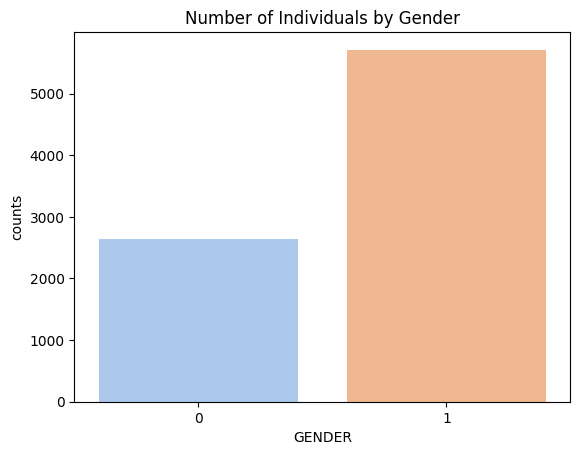

In [ ]:
# 성별
sns.countplot(data=df, x='GENDER', palette='pastel')
plt.xlabel('GENDER')
plt.ylabel('counts')
plt.title('Number of Individuals by Gender')
plt.show()

In [ ]:
df['GENDER'].value_counts()

1    5711
0    2632
Name: GENDER, dtype: int64

여자가 두 배 이상 많음

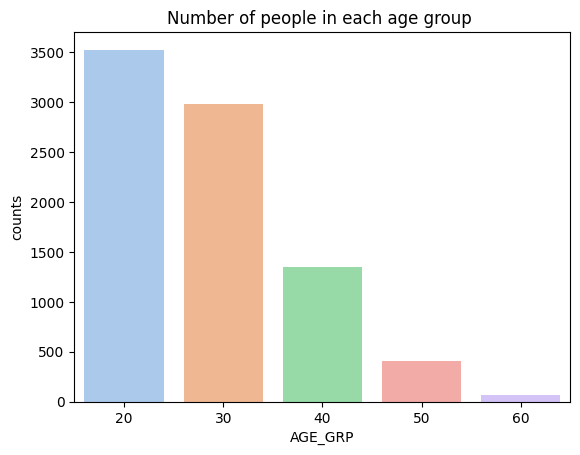

In [ ]:
# 나이
sns.countplot(data=df, x='AGE_GRP', palette='pastel')
plt.xlabel('AGE_GRP')
plt.ylabel('counts')
plt.title('Number of people in each age group ')
plt.show()

In [ ]:
df['AGE_GRP'].value_counts()

20    3524
30    2985
40    1353
50     411
60      70
Name: AGE_GRP, dtype: int64

2 ~ 30대가 가장 많음

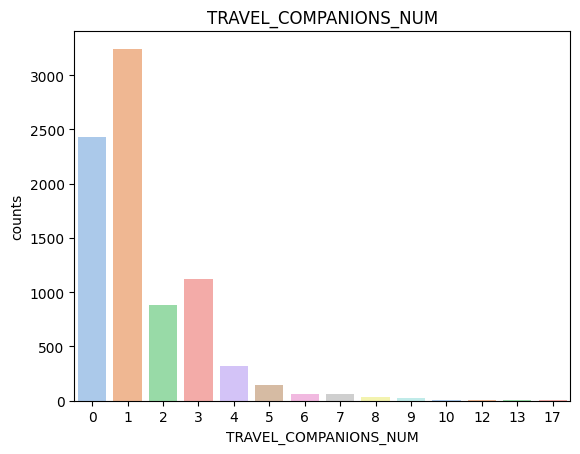

In [ ]:
# 동반자 수
sns.countplot(data=df, x='TRAVEL_COMPANIONS_NUM', palette='pastel')
plt.xlabel('TRAVEL_COMPANIONS_NUM')
plt.ylabel('counts')
plt.title('TRAVEL_COMPANIONS_NUM')
plt.show()

둘이서 하는 여행이 압도적으로 많음

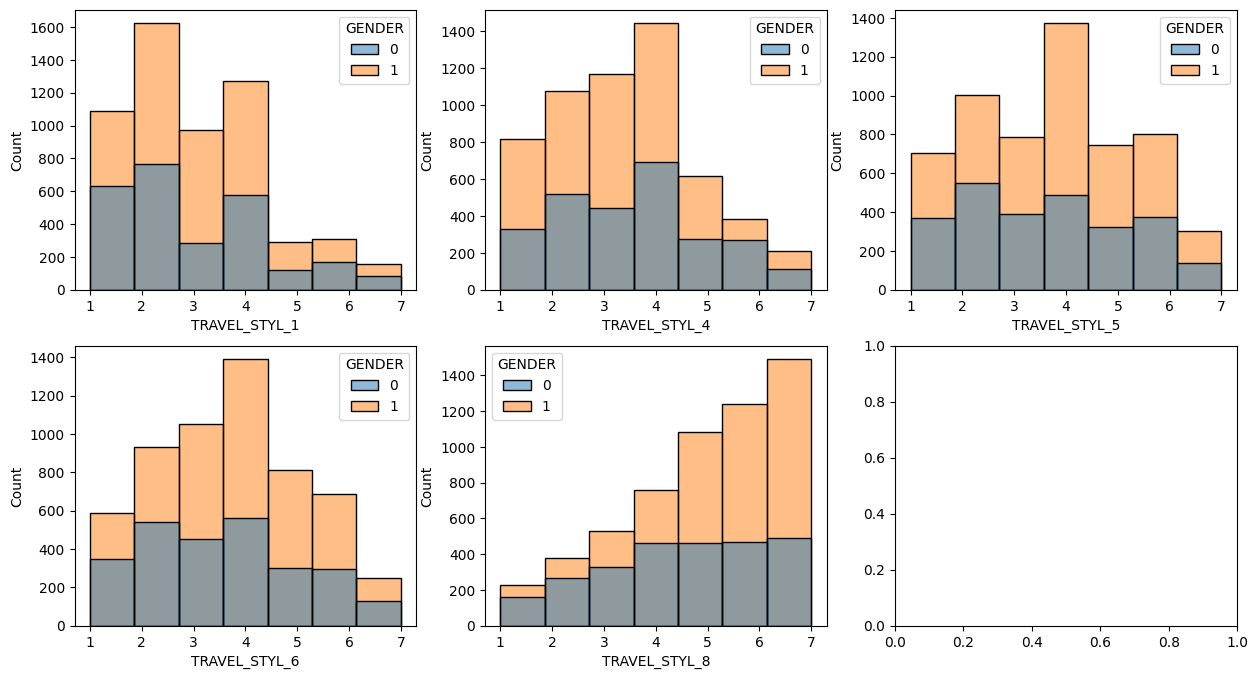

In [ ]:
# 성별에 따른 여행스타일
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))

sns.histplot(data=df, x='TRAVEL_STYL_1', hue='GENDER', bins=7, ax=ax[0, 0])
sns.histplot(data=df, x='TRAVEL_STYL_4', hue='GENDER', bins=7, ax=ax[0, 1])
sns.histplot(data=df, x='TRAVEL_STYL_5', hue='GENDER', bins=7, ax=ax[0, 2])
sns.histplot(data=df, x='TRAVEL_STYL_6', hue='GENDER', bins=7, ax=ax[1, 0])
sns.histplot(data=df, x='TRAVEL_STYL_8', hue='GENDER', bins=7, ax=ax[1, 1])

plt.show()

TRAVEL_STYL_1 : 남녀 모두 자연 여행지 압도적으로 선호


TRAVEL_STYL_4 : 여자는 편하지만 비싼 숙소 선호, But 남자는 여자만큼 선호도가 뚜렷하지 않음


TRAVEL_STYL_5 : 남녀 모두 휴양/휴식 or 체험활동 고루 선호


TRAVEL_STYL_6 : 남녀 모두 잘 알려지지 않은 방문지를 미세하게 선호하나 비슷함


TRAVEL_sTYL_8 : 여자는 사진이 매우 중요, 남자는 중요하긴 한데~ 비슷비슷

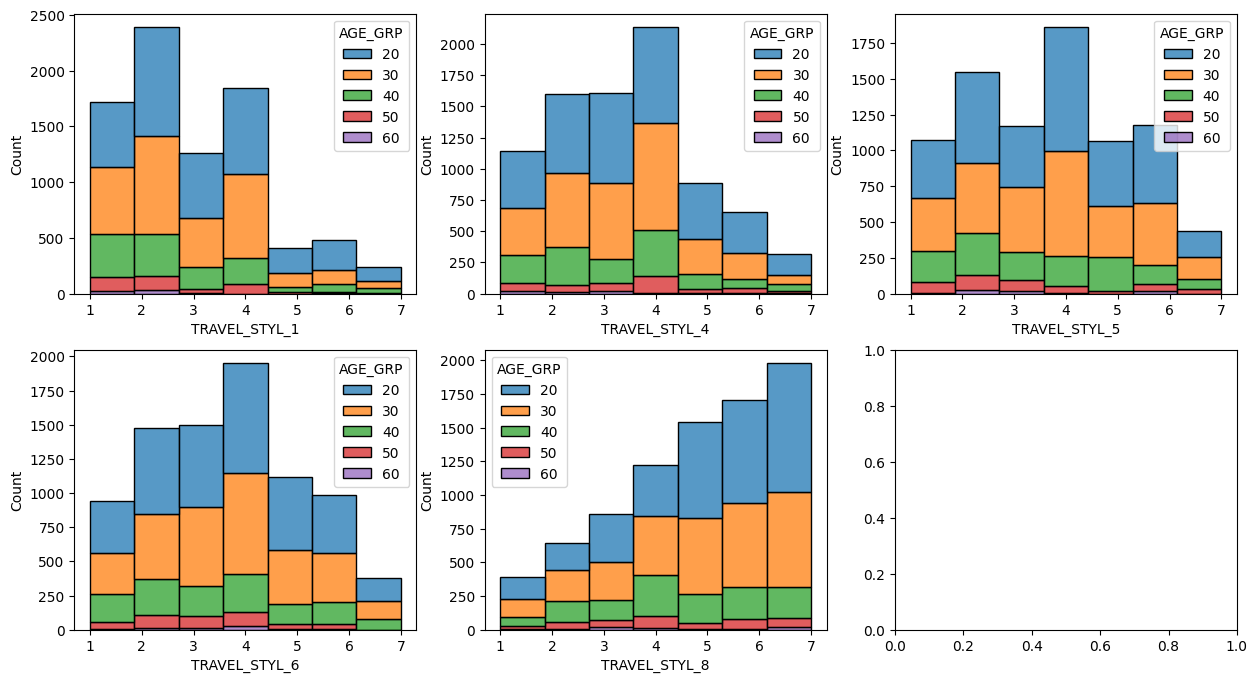

In [ ]:
# 연령대에 따른 여행스타일
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
my_palette = sns.color_palette("tab10")

sns.histplot(data=df, x='TRAVEL_STYL_1', hue='AGE_GRP', bins=7, ax=ax[0, 0], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_4', hue='AGE_GRP', bins=7, ax=ax[0, 1], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_5', hue='AGE_GRP', bins=7, ax=ax[0, 2], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_6', hue='AGE_GRP', bins=7, ax=ax[1, 0], palette=my_palette, multiple='stack')
sns.histplot(data=df, x='TRAVEL_STYL_8', hue='AGE_GRP', bins=7, ax=ax[1, 1], palette=my_palette, multiple='stack')

plt.show()

TRAVEL_STYL_1 : 전 연령대 자연 선호, 특히 50대 이상


TRAVEL_STYL_4 : 전 연령대 편하지만 비싼 숙소가 좋지만 (4) 중립이 가장 많음, 20대는 비슷


TRAVEL_STYL_5 : 휴양 VS 체험활동 반반


TRAVEL_STYL_6 : 잘 알려지지 않은 방문지를 선호하는 편이나 중립이 가장 많음


TRAVEL_STYL_8 : 2,30대는 사진 매우 중요. 40대 이상은 비슷비슷

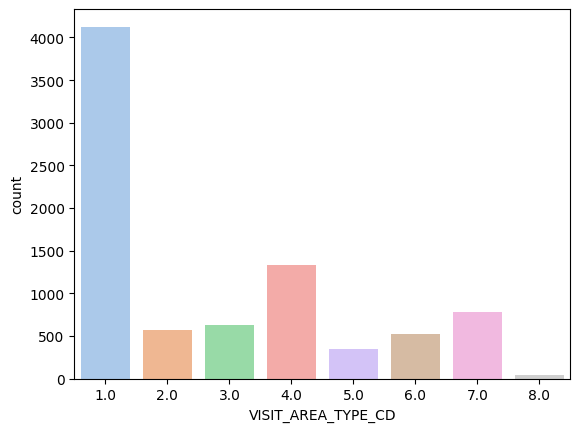

In [ ]:
# 방문지유형코드
sns.countplot(data=df, x='VISIT_AREA_TYPE_CD', palette='pastel')
plt.show()

1 : 자연  


2 : 역사/유적/종교 (문화재, 박물관, 촬영지, 절 등)  


3 : 문화시설(공연장, 영화관, 전시관 등)  


4 : 상업지구(거리, 시장, 쇼핑시설)  


5 : 레저/스포츠 (스키, 카트, 수상레저)  


6 : 테마시설(놀이공원, 워터파크)  


7 : 산책로, 둘레길  


8 : 지역축제  





---


압도적인 비율의 자연관광지. 아마 제주라 해수욕장이나 오름을 많이 방문하지 않았을까 싶음. 그 뒤를 잇는건 시장이 있는 상업지구


In [ ]:
# 방문 장소 상위 20개 관광지 출력
df['VISIT_AREA_NM'].value_counts().head(20)

서귀포매일올레시장    305
함덕해수욕장       223
제주동문시장       201
협재해수욕장       188
성산일출봉        178
새별오름         135
제주동문재래시장     129
이호테우해수욕장     129
오설록티뮤지엄      115
섭지코지         104
금오름           93
곽지해수욕장        92
우도            87
스누피가든         83
비자림           82
천지연폭포         81
정방폭포          77
용머리해안         75
김녕해수욕장        74
금능해수욕장        72
Name: VISIT_AREA_NM, dtype: int64

In [ ]:
df.head()

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
1,d_d000296,2.208190e+09,산굼부리,제주특별자치도,제주시,조천읍,1.0,5.0,126.693832,33.432574,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
2,d_d000296,2.208190e+09,한라산국립공원 관음사탐방로,제주특별자치도,제주시,오라이동,1.0,5.0,126.538006,33.390838,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
3,d_d000296,2.208200e+09,스누피가든,제주특별자치도,제주시,구좌읍,6.0,5.0,126.779668,33.443359,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
4,d_d000296,2.208180e+09,협재해수욕장,제주특별자치도,제주시,한림읍,1.0,5.0,126.239158,33.393866,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
5,d_d000296,2.208180e+09,더마파크,제주특별자치도,제주시,한림읍,5.0,5.0,126.244325,33.35413,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3


In [ ]:
visit_area_counts = df.groupby('VISIT_AREA_NM')['TRAVEL_ID'].count()

역시 시장 및 해수욕장, 폭포, 오름이 많음

In [ ]:
# 많이 방문한 군/구
df['GUNGU'].value_counts()

제주시     4747
서귀포시    3596
Name: GUNGU, dtype: int64

In [ ]:
# 많이 방문한 읍/면/동
df['EUPMYEON'].value_counts().head(10)

안덕면    849
구좌읍    782
애월읍    713
한림읍    601
조천읍    596
성산읍    574
서귀동    477
우도면    282
서홍동    257
대정읍    226
Name: EUPMYEON, dtype: int64

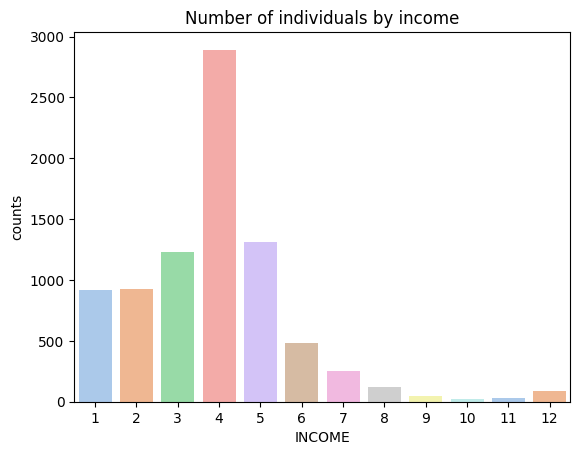

In [ ]:
# 소득구간
sns.countplot(data=df, x='INCOME', palette='pastel')
plt.xlabel('INCOME')
plt.ylabel('counts')
plt.title('Number of individuals by income')
plt.show()

월평균 100만원미만 부터 월평균 1000만원 이상까지 총 12구간

이걸로 소득구간에 따른 방문 장소 타입, 여행스타일 eda 해봤는데 큰 의미 없어서 지웠음

<Axes: xlabel='DGSTFN', ylabel='count'>

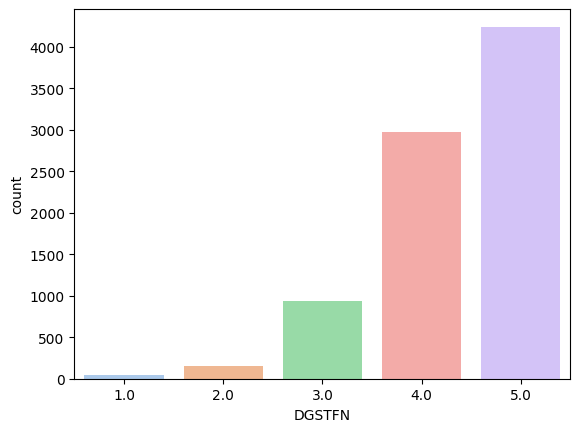

In [ ]:
# 만족도
sns.countplot(data=df, x='DGSTFN', palette='pastel')

In [ ]:
df['DGSTFN'].value_counts()

5.0    4241
4.0    2971
3.0     937
2.0     151
1.0      42
Name: DGSTFN, dtype: int64

In [ ]:
# 만족도가 1인 방문지 42곳 알아보기
unsatisfied_places = df[df['DGSTFN'] == 1]
print(unsatisfied_places['VISIT_AREA_NM'].value_counts())

삼성혈                     2
메밀꽃밭                    1
아쿠아플라넷 제주               1
9.81파크                  1
신화워터파크                  1
산방산                     1
금능해수욕장                  1
새섬                      1
윗세오름                    1
건강과성박물관                 1
아르떼뮤지엄 제주               1
추사유배지                   1
한라산국립공원 성판악탐방로-관음사코스    1
새별오름                    1
아프리카박물관                 1
생각하는정원                  1
산굼부리                    1
해녀박물관                   1
뽀로로앤타요테마파크 제주           1
섭지코지                    1
용두암                     1
정방폭포                    1
소정방폭포                   1
작가의산책길 종합안내소            1
보롬왓                     1
양떼목장                    1
비양도                     1
오설록티뮤지엄                 1
제주스쿠터투어                 1
비밀의숲                    1
오션트래블러                  1
수목원길야시장                 1
소천지                     1
훈데르트바서파크                1
스카이워터쇼                  1
제주동문재래시장                1
제주밭담테마공원                1
선운정사                    1
신세계사이먼 제주프리미

In [ ]:
# 만족도가 1, 2인 방문지 알아보기
unsatisfied_places = df[(df['DGSTFN'] == 1) | (df['DGSTFN'] == 2)]
print(unsatisfied_places['VISIT_AREA_NM'].value_counts())

제주동문시장          6
용머리해안           6
오설록티뮤지엄         6
중문색달해수욕장        4
윈드1947카트테마파크    4
               ..
수목원테마파크         1
고흐의정원           1
작가의산책길 종합안내소    1
서귀포치유의숲         1
돌염전             1
Name: VISIT_AREA_NM, Length: 135, dtype: int64


뭔가 1점이나 2점을  여러번 받은 관광지면 추천할 때 빼면 좋을 것 같다고 생각했는데 결과가 몹시 주관적이네요. 그냥 넘어가는게 좋을 듯

<Axes: >

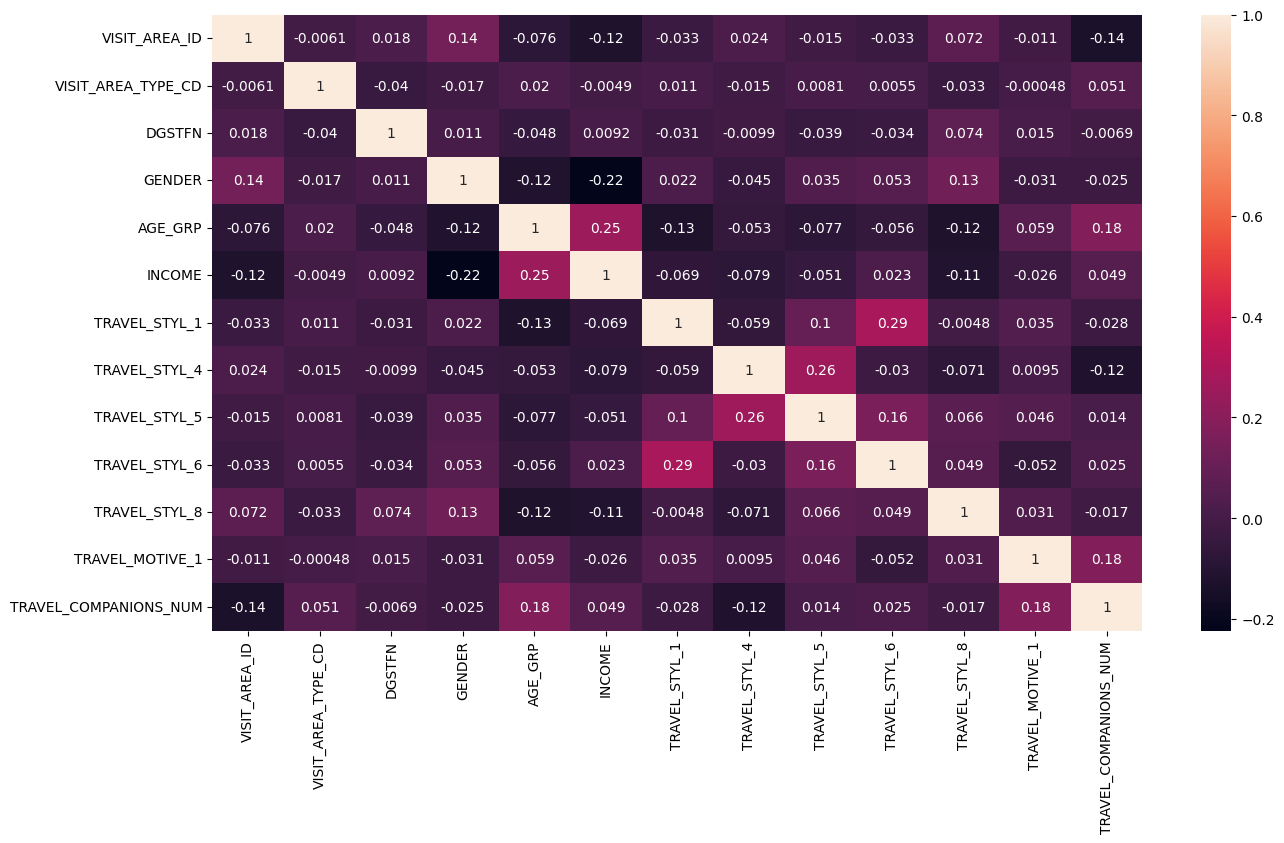

In [ ]:
# 상관관계
plt.figure(figsize=(15, 8))
sns.heatmap(data = df.corr(), cbar = True, annot = True)

1- 자연 vs 도시

4- 편하지만 비싼 숙소 vs 불편하지만 저렴한 숙소

5- 휴양/휴식 vs 체험활동

6- 잘 알려지지 않은 방문지 vs 알려진 방문지



---



대체로 자연이 좋은 사람들이 잘 알려지지 않은 방문지를 (1,6)

편하지만 비싼 숙소를 선호하는 사람들이 휴양/휴식을 좋아함

그러나 상관관계가 0.3 수준이므로 ...

## 숙박소비내역 EDA

### 데이터 로드

In [ ]:
lodge_consume_his = pd.read_csv(path + '/TS_csv/tn_lodge_consume_his_숙박소비내역_D.csv')

### 변수 선택

TRAVEL_ID 여행 ID


LODGING_NM 숙소명


LODGING_TYPE_CD 숙소유형코드


PAYMENT_NUM	소비인원


ROAD_NM_ADDR  도로명주소


PAYMENT_AMT_WON 결제금액_원



In [ ]:
lodge_consume_his = lodge_consume_his[['TRAVEL_ID', 'LODGING_NM', 'LODGING_TYPE_CD', 'PAYMENT_NUM', 'ROAD_NM_ADDR', 'PAYMENT_AMT_WON']]
lodge_consume_his.head()

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON
0,d_d001688,제주품에독채펜션,3,4,NaN,139000
1,d_d005999,노블피아,1,4,NaN,62785
2,c_c003813,애견펜션 돌봄,3,2,충남 태안군 안면읍 통샘길 256-5,160000
3,a_a001302,아삭아삭순무민박,8,1,인천 강화군 강화읍 강화대로368번길 6,50000
4,d_d006672,오르비레터,3,4,NaN,0


In [ ]:
lodge_consume_his['LODGING_TYPE_CD'].unique()

array([ 3,  1,  8,  7,  5,  4, 11,  2,  9, 10,  6])

### 전처리 및 데이터 합치기

In [ ]:
# 제주 아닌 것 + 결측값 거르기
filtered_data = lodge_consume_his[lodge_consume_his['ROAD_NM_ADDR'].str.contains('제주특별자치도') == False]
filtered_data.value_counts().sum()

1218

In [ ]:
lodge_consume_his = lodge_consume_his[lodge_consume_his['ROAD_NM_ADDR'].str.contains('제주특별자치도') == True]
lodge_consume_his.head()

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON
5,d_d001115,유탑유블레스호텔 제주,1,3,제주특별자치도 제주시 조천읍 조함해안로 502,220000
6,d_d006209,봉스테이,7,1,제주특별자치도 제주시 봉개대동10길 4,20124
7,d_d003005,스타즈호텔 제주로베로,1,2,제주특별자치도 제주시 관덕로 26,40755
12,d_d000968,그랜드조선 제주,1,3,제주특별자치도 서귀포시 중문관광로72번길 29-5,479254
14,d_d002187,타마라 제주,1,2,제주특별자치도 서귀포시 김정문화로41번길 10-8,66134


In [ ]:
# 그냥 기존에 합쳐놓은 df에 합쳤음
df = pd.merge(lodge_consume_his, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'right')

In [ ]:
# 결측값 그냥 없애버리기
df = df.dropna()

In [ ]:
# 중복데이터 확인
df.duplicated().sum()

70

In [ ]:
df['LODGING_NM'].value_counts()

그랜드하얏트제주            127
금호제주리조트              99
휘닉스제주                87
랜딩관 제주신화월드호텔앤리조트     82
골든튤립제주성산호텔           76
                   ... 
금호리조트                 1
제주달리펜션                1
쁘띠제주빅터펜션              1
호텔G                   1
삼무뚝배기                 1
Name: LODGING_NM, Length: 864, dtype: int64

In [ ]:
filtered_df = df['LODGING_NM'].value_counts()[df['LODGING_NM'].value_counts() == 4]

In [ ]:
filtered_df.value_counts()

4    80
Name: LODGING_NM, dtype: int64

In [ ]:
# 얘도 그냥 없애기로
df = df.drop_duplicates()
df.head()

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2.208190e+09,산굼부리,제주특별자치도,제주시,조천읍,1.0,5.0,126.693832,33.432574,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
1,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2.208190e+09,한라산국립공원 관음사탐방로,제주특별자치도,제주시,오라이동,1.0,5.0,126.538006,33.390838,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
2,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2.208200e+09,스누피가든,제주특별자치도,제주시,구좌읍,6.0,5.0,126.779668,33.443359,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
3,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2.208180e+09,협재해수욕장,제주특별자치도,제주시,한림읍,1.0,5.0,126.239158,33.393866,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
4,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2.208180e+09,더마파크,제주특별자치도,제주시,한림읍,5.0,5.0,126.244325,33.35413,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3


In [ ]:
df['VISIT_AREA_NM'].value_counts()

서귀포매일올레시장    358
제주동문시장       246
함덕해수욕장       238
성산일출봉        212
협재해수욕장       197
            ... 
서부두방파제         1
진지동굴           1
제주사월           1
더블유            1
도치돌목장          1
Name: VISIT_AREA_NM, Length: 958, dtype: int64

In [ ]:
df['DGSTFN'].value_counts()

5.0    4669
4.0    3287
3.0    1019
2.0     168
1.0      44
Name: DGSTFN, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187 entries, 0 to 11990
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              9187 non-null   object 
 1   LODGING_NM             9187 non-null   object 
 2   LODGING_TYPE_CD        9187 non-null   float64
 3   PAYMENT_NUM            9187 non-null   float64
 4   ROAD_NM_ADDR           9187 non-null   object 
 5   PAYMENT_AMT_WON        9187 non-null   float64
 6   VISIT_AREA_ID          9187 non-null   float64
 7   VISIT_AREA_NM          9187 non-null   object 
 8   SIDO                   9187 non-null   object 
 9   GUNGU                  9187 non-null   object 
 10  EUPMYEON               9187 non-null   object 
 11  VISIT_AREA_TYPE_CD     9187 non-null   float64
 12  DGSTFN                 9187 non-null   float64
 13  X_COORD                9187 non-null   object 
 14  Y_COORD                9187 non-null   object 
 15  TRA

In [ ]:
#추가

df['VISIT_AREA_ID']=df['VISIT_AREA_ID'].astype('object')

In [ ]:
df['VISIT_AREA_ID']

0        2208190004.0
1        2208190002.0
2        2208200001.0
3        2208180007.0
4        2208180005.0
             ...     
11986    2210290006.0
11987    2210300004.0
11988    2210290004.0
11989    2210300001.0
11990    2210300006.0
Name: VISIT_AREA_ID, Length: 9187, dtype: object

### 시각화

<Axes: xlabel='LODGING_TYPE_CD', ylabel='count'>

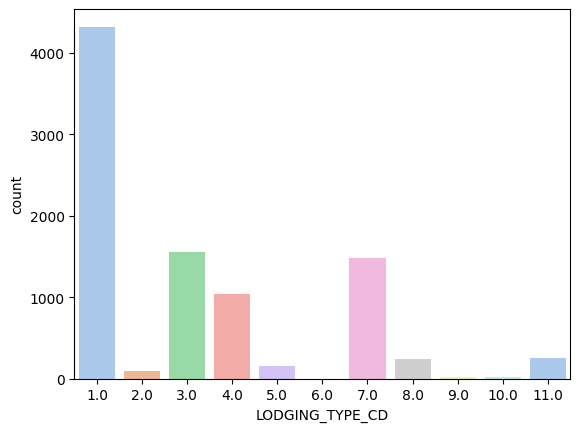

In [ ]:
# 숙소유형코드별 개수
sns.countplot(data=df, x='LODGING_TYPE_CD', palette='pastel')

LODGING_TYPE_CD


1 : 호텔  
2 : 모텔/여관  
3 : 펜션  
4 : 콘도/리조트  
5 : 캠핑/글램핑  
6 : 전통 숙박시설  
7 : 게스트하우스  
8 : 민박  
9 : 자연휴양림내 시설  
10 : 가족/친지집  
11 : 기타   



---



압도적인 비율로 호텔이 제일 많고 그 뒤는 펜션 및 게스트하우스.

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

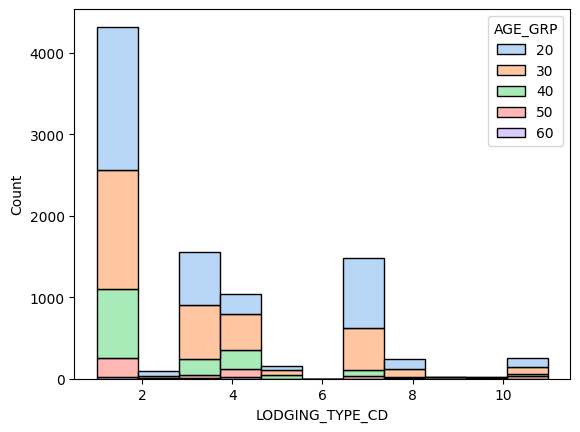

In [ ]:
# 나이대에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='AGE_GRP', multiple='stack', bins=11)

큰 차이없이 모두 호텔, 펜션 및 리조트를 가장 많이 이용.


굳이 언급하자면 40대 이상은 게스트하우스 이용률이 현저히 낮다  
아마 가족단위로 움직이기 때문이 아닐까

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

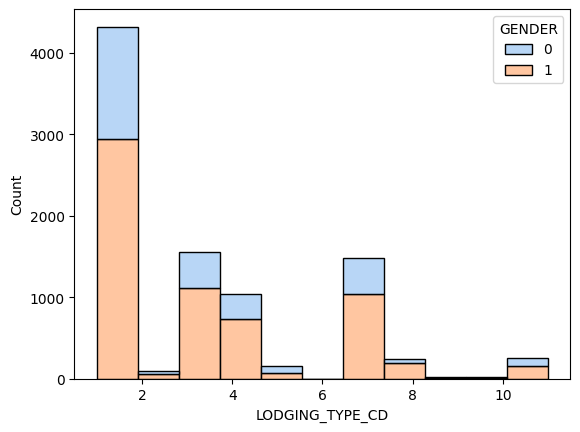

In [ ]:
# 성별에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='GENDER', multiple='stack', bins=11)

<Axes: xlabel='LODGING_TYPE_CD', ylabel='Count'>

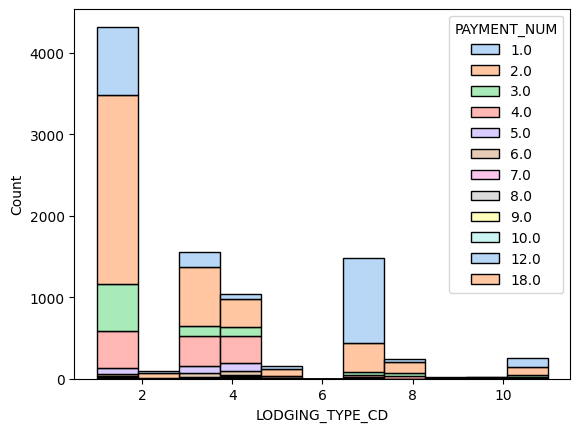

In [ ]:
# 숙소 소비인원 수에 따른 숙박유형 비율
sns.histplot(data=df, x='LODGING_TYPE_CD', palette='pastel', hue='PAYMENT_NUM', multiple='stack', bins=11)

혼자 온 사람들은 게스트하우스 이용률이 높다. 둘이서 온 사람들은 주로 호텔을, 둘 이상은 호텔 > 펜션 > 리조트

# 숙소 추천

## 랜덤포레스트

In [ ]:
# 여행자 정보로 숙박 유형 코드 예측하기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df[['GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5',
        'TRAVEL_STYL_6', 'TRAVEL_STYL_8', 'TRAVEL_COMPANIONS_NUM']]
y = df['LODGING_TYPE_CD']

# 8:2로 분류
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# 트리 일단 100개 만들기
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = pd.DataFrame({'pred': y_pred, 'result': y_test})

result['matching'] = (result['pred'] == result['result'])

print(result)

In [ ]:
# 성능 평가 - accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# 성능 평가 - F1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

In [ ]:
# n_estimators 의 차이에 따른 결과 비교

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

for n in [10, 30, 50, 100]:
  model = RandomForestClassifier(n_estimators = n, random_state=42)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"n_estimators={n}: Accuracy={accuracy}")

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187 entries, 0 to 11990
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              9187 non-null   object 
 1   LODGING_NM             9187 non-null   object 
 2   LODGING_TYPE_CD        9187 non-null   float64
 3   PAYMENT_NUM            9187 non-null   float64
 4   ROAD_NM_ADDR           9187 non-null   object 
 5   PAYMENT_AMT_WON        9187 non-null   float64
 6   VISIT_AREA_ID          9187 non-null   object 
 7   VISIT_AREA_NM          9187 non-null   object 
 8   SIDO                   9187 non-null   object 
 9   GUNGU                  9187 non-null   object 
 10  EUPMYEON               9187 non-null   object 
 11  VISIT_AREA_TYPE_CD     9187 non-null   float64
 12  DGSTFN                 9187 non-null   float64
 13  X_COORD                9187 non-null   object 
 14  Y_COORD                9187 non-null   object 
 15  TRA

In [ ]:
# 숫자로 변환할 열의 리스트
numeric_columns = ['GENDER', 'AGE_GRP', 'TRAVEL_STYL_1', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5',
                   'TRAVEL_STYL_6', 'TRAVEL_STYL_8']

# 숫자로 변환
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# 변환된 열을 확인합니다.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187 entries, 0 to 11990
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAVEL_ID              9187 non-null   object 
 1   LODGING_NM             9187 non-null   object 
 2   LODGING_TYPE_CD        9187 non-null   float64
 3   PAYMENT_NUM            9187 non-null   float64
 4   ROAD_NM_ADDR           9187 non-null   object 
 5   PAYMENT_AMT_WON        9187 non-null   float64
 6   VISIT_AREA_ID          9187 non-null   object 
 7   VISIT_AREA_NM          9187 non-null   object 
 8   SIDO                   9187 non-null   object 
 9   GUNGU                  9187 non-null   object 
 10  EUPMYEON               9187 non-null   object 
 11  VISIT_AREA_TYPE_CD     9187 non-null   float64
 12  DGSTFN                 9187 non-null   float64
 13  X_COORD                9187 non-null   object 
 14  Y_COORD                9187 non-null   object 
 15  TRA

In [ ]:
x = df[['GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5',
        'TRAVEL_STYL_6', 'TRAVEL_STYL_8', 'TRAVEL_COMPANIONS_NUM']]
y = df['LODGING_TYPE_CD']

In [ ]:
print(df['LODGING_TYPE_CD'].value_counts())


1.0     4319
3.0     1554
7.0     1486
4.0     1034
11.0     256
8.0      248
5.0      151
2.0       96
10.0      24
9.0       18
6.0        1
Name: LODGING_TYPE_CD, dtype: int64


In [ ]:
print(df['LODGING_TYPE_CD'].unique())


[ 4.  5.  1.  3.  7.  8. 11.  2. 10.  9.  6.]


In [ ]:
from sklearn.model_selection import train_test_split
# 8:2로 분할
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
    )

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)

x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)


In [ ]:
print(y_train_resampled.value_counts())

1.0     3463
7.0     3463
3.0     3463
5.0     3463
11.0    3463
4.0     3463
10.0    3463
8.0     3463
2.0     3463
9.0     3463
6.0     3463
Name: LODGING_TYPE_CD, dtype: int64


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
param= {
    'eval_metric': ['merror','mlogloss'],
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softmax',  # 다중 클래스 분류 문제
    'num_class': len(y.unique())    # 클래스 개수
}

In [ ]:
# y_train_resampled의 클래스를 1씩 빼서 0부터 10까지의 클래스로 변환
y_train_resampled = y_train_resampled - 1
y_test = y_test -1

In [ ]:
# Train XGBoost model
model = xgb.XGBClassifier(param)
model.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
x_test

,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_COMPANIONS_NUM
7761,0,20,2,4,2,2,5,4,1
4119,1,30,5,4,4,5,4,5,0
5715,1,20,4,4,3,3,4,3,1
8249,1,20,1,5,3,6,5,6,1
2055,1,30,6,3,3,5,6,5,0
...,...,...,...,...,...,...,...,...,...
4473,1,20,4,6,1,5,6,7,2
7267,1,30,3,2,7,7,4,5,1
5590,1,20,3,4,3,2,6,1,1
466,1,20,2,2,3,3,5,6,1


In [ ]:
# Make predictionsㅇ
y_pred = model.predict(x_test)

# 예측 결과 출력
result = pd.DataFrame({'pred': y_pred, 'result': y_test})
result['matching'] = (result['pred'] == result['result'])
print(result)

      pred  result  matching
7761     6     6.0      True
4119     0     0.0      True
5715     0     0.0      True
8249     0     0.0      True
2055     6     6.0      True
...    ...     ...       ...
4473    10    10.0      True
7267     2     2.0      True
5590     0     0.0      True
466      7     0.0     False
7861     0     0.0      True

[1838 rows x 3 columns]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.56%


In [ ]:
recommendation_input = y_pred[0]+1

In [ ]:
recommendation_input

NameError: name 'recommendation_input' is not defined

In [ ]:
df

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2208190004.0,산굼부리,제주특별자치도,제주시,조천읍,1.0,5.0,126.693832,33.432574,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
1,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2208190002.0,한라산국립공원 관음사탐방로,제주특별자치도,제주시,오라이동,1.0,5.0,126.538006,33.390838,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
2,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2208200001.0,스누피가든,제주특별자치도,제주시,구좌읍,6.0,5.0,126.779668,33.443359,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
3,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2208180007.0,협재해수욕장,제주특별자치도,제주시,한림읍,1.0,5.0,126.239158,33.393866,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
4,d_d000296,한림리조트,4.0,4.0,제주특별자치도 제주시 한림읍 일주서로 5083-5,104000.0,2208180005.0,더마파크,제주특별자치도,제주시,한림읍,5.0,5.0,126.244325,33.35413,d000296,대중교통 등,0,40,8,2,2,5,4,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,d_d003147,그리고세화 1호점,7.0,1.0,제주특별자치도 제주시 구좌읍 구좌로 149-9,45000.0,2210290006.0,올레길 20코스(김녕-하도 올레),제주특별자치도,제주시,구좌읍,7.0,4.0,126.805472,33.554245,d003147,자가용,1,20,5,3,4,2,2,4,2,0
11987,d_d003147,그리고세화 1호점,7.0,1.0,제주특별자치도 제주시 구좌읍 구좌로 149-9,45000.0,2210300004.0,지미봉,제주특별자치도,제주시,구좌읍,1.0,5.0,126.902439,33.499313,d003147,자가용,1,20,5,3,4,2,2,4,2,0
11988,d_d003147,그리고세화 1호점,7.0,1.0,제주특별자치도 제주시 구좌읍 구좌로 149-9,45000.0,2210290004.0,월정리해수욕장,제주특별자치도,제주시,구좌읍,1.0,4.0,126.795805,33.556469,d003147,자가용,1,20,5,3,4,2,2,4,2,0
11989,d_d003147,그리고세화 1호점,7.0,1.0,제주특별자치도 제주시 구좌읍 구좌로 149-9,45000.0,2210300001.0,세화민속오일시장,제주특별자치도,제주시,구좌읍,4.0,4.0,126.8574647,33.52591225,d003147,자가용,1,20,5,3,4,2,2,4,2,0


In [ ]:
recommendation_df = df[df['LODGING_TYPE_CD'] == 3]

In [ ]:
recommendation_df

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
17,d_d006739,아침해변펜션,3.0,1.0,제주특별자치도 제주시 조천읍 조함해안로 76-9,29000.0,2210250005.0,함덕해수욕장,제주특별자치도,제주시,조천읍,1.0,5.0,126.669239,33.543062,d006739,대중교통 등,0,20,1,4,6,4,5,4,1,0
20,d_d006739,아침해변펜션,3.0,1.0,제주특별자치도 제주시 조천읍 조함해안로 76-9,29000.0,2210240006.0,제주동문시장,제주특별자치도,제주시,일도일동,4.0,3.0,126.5283034,33.51278396,d006739,대중교통 등,0,20,1,4,6,4,5,4,1,0
23,d_d006739,아침해변펜션,3.0,1.0,제주특별자치도 제주시 조천읍 조함해안로 76-9,29000.0,2210250003.0,씽씽왕발통,제주특별자치도,제주시,구좌읍,5.0,3.0,126.7552267,33.5576319,d006739,대중교통 등,0,20,1,4,6,4,5,4,1,0
26,d_d006739,아침해변펜션,3.0,1.0,제주특별자치도 제주시 조천읍 조함해안로 76-9,29000.0,2210260003.0,사라봉공원,제주특별자치도,제주시,건입동,1.0,5.0,126.545546,33.51728425,d006739,대중교통 등,0,20,1,4,6,4,5,4,1,0
29,d_d004837,인디안썸머,3.0,2.0,제주특별자치도 서귀포시 남원읍 하례망장포로26번길 3,130000.0,2210250005.0,물영아리,제주특별자치도,서귀포시,남원읍,1.0,4.0,126.692064,33.368395,d004837,대중교통 등,1,20,2,3,3,4,5,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,d_d002701,864펜션,3.0,2.0,제주특별자치도 서귀포시 안덕면 덕수동로 18-4,260000.0,2210200007.0,모퉁이옷장,제주특별자치도,제주시,삼도이동,4.0,3.0,126.5204183,33.51201078,d002701,대중교통 등,1,30,1,4,2,3,3,5,4,1
11956,d_d002701,864펜션,3.0,2.0,제주특별자치도 서귀포시 안덕면 덕수동로 18-4,260000.0,2210170001.0,스누피가든,제주특별자치도,제주시,구좌읍,3.0,5.0,126.7796675,33.44335922,d002701,대중교통 등,1,30,1,4,2,3,3,5,4,1
11962,d_d002701,864펜션,3.0,2.0,제주특별자치도 서귀포시 안덕면 덕수동로 18-4,260000.0,2210120002.0,한담해변,제주특별자치도,제주시,애월읍,1.0,4.0,126.3101829,33.46222496,d002701,대중교통 등,1,30,1,4,2,3,3,5,4,1
11968,d_d002701,864펜션,3.0,2.0,제주특별자치도 서귀포시 안덕면 덕수동로 18-4,260000.0,2210200011.0,다이소 제주동문시장점,제주특별자치도,제주시,일도1동,4.0,4.0,126.5265139,33.51289975,d002701,대중교통 등,1,30,1,4,2,3,3,5,4,1


In [ ]:
recommendation_df['TRAVELER_ID'].value_counts()

d009241    48
d005997    42
d000159    32
d004817    28
d002256    22
           ..
d002440     1
d005364     1
d000447     1
d004763     1
d002670     1
Name: TRAVELER_ID, Length: 237, dtype: int64

# 여행지 추천

감이 안와서 단순 여행지 추천부터 해볼게요

근데 내 생각엔 다들 비슷할 것 같아서 보면서 이해해보라고 이 부분 냅둬볼게요?

In [ ]:
# 결측값 없음
df.isna().sum().sum()

0

(성준) user_ID를 단순 인덱스로 넣어줘서 뒤에 SVD에서 너무 낮은 수치로 나온듯! DB에 TRAVELER_ID 있으니까 index를 TRAVERLER_ID로 해주면 조금 괜찮아짐!

In [ ]:
# 유사도에 갖다 쓸 입력 변수 가져오기
user_item_data = recommendation_df[['TRAVELER_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'DGSTFN']]
user_item_data

,TRAVELER_ID,VISIT_AREA_ID,VISIT_AREA_NM,DGSTFN
17,d006739,2210250005.0,함덕해수욕장,5.0
20,d006739,2210240006.0,제주동문시장,3.0
23,d006739,2210250003.0,씽씽왕발통,3.0
26,d006739,2210260003.0,사라봉공원,5.0
29,d004837,2210250005.0,물영아리,4.0
...,...,...,...,...
11950,d002701,2210200007.0,모퉁이옷장,3.0
11956,d002701,2210170001.0,스누피가든,5.0
11962,d002701,2210120002.0,한담해변,4.0
11968,d002701,2210200011.0,다이소 제주동문시장점,4.0


In [ ]:
# 유저가 방문하지 않은 장소의 평점은 0점으로 채워줌
user_visit_area_rating = user_item_data.pivot_table('DGSTFN', index='TRAVELER_ID', columns='VISIT_AREA_NM').fillna(0)
user_visit_area_rating.head()

VISIT_AREA_NM,9.81파크,CGV 제주노형,ICC제주국제컨벤션센터,JD스포츠 제주칠성점,가디언다이브리조트,가시리마을4.3길센터,가파도,감귤박물관,강정천,거문오름,거슨세미오름,건강과성박물관,검멀레해변,고살리숲길,고성오일시장,공백,과물노천탕,곽지해수욕장,관덕정,관음사,광치기해변,구좌약국,국립제주박물관,국제리더스클럽,군산,그리스신화박물관,글라글라하와이,금능해수욕장,금오름,금호리조트 제주아쿠아나,기당미술관,김녕미로공원,김녕사굴,김녕해수욕장,김녕해안도로,김정문알로에 알로에숲,남원큰엉해변,너븐숭이4.3기념관,넥슨컴퓨터박물관,노리매,노을해안1014,노형수산시장,노형수퍼마켙,다랑쉬오름,다이나믹메이즈 제주도성읍점,다이소 제주동문시장점,다이소 제주애월점,닭머르,답다니탑망대,당산봉,대한불교조계종천왕사,더마파크,더블유,도구리알,도깨동산,도두동무지개해안도로,도두봉,도시섬시장,돈내코유원지,돌염전,돌오름길 천아숲길 입출구,돌하르방미술관,동복 해녀해산물직판장,동암사,드르쿰다in성산,디앤디파트먼트 제주,따라비오름,랑데뷰펜션,러블리제주,레이저아레나 엑스 제주점,롯데마트 제주점,루나폴,마노르블랑,마라도,마보기,마켓제주,만장굴,메이즈랜드,모슬포항,모이소,모퉁이옷장,목장카페 밭디,무민랜드제주,문도지오름,문화예술 공공수장고,물메초등학교,물영아리,민트카페&스튜디오,바이나흐튼 크리스마스박물관,바이제주,박수기정,밤수지맨드라미,방주교회,백약이오름,벵뒤굴,별방진,보롬왓,보미다,본태박물관,부림온천,붉은오름자연휴양림,브릭캠퍼스 제주,비밀의숲,비양도,비양도등대,비양도망대,비자림,비체올린,뽀로로앤타요테마파크 제주,삐꼴라상점,사계해변,사라봉공원,사람휘트니스 연동점,사려니숲길,사려니숲길 붉은오름 입구,사진놀이터,산굼부리,산방산,산방산탄산온천,산양큰엉곶,산지등대,산짓물공원,삼다수숲길,삼양검은모래해변입구교차로,삼양해수욕장,상가리야자숲,상효원수목원,새로나분식,새별오름,새연교,생각하는정원,생이기정,샵제주,서귀다원,서귀포국수마을,서귀포기적의도서관,서귀포매일올레시장,서귀포매일올레시장 입구,서귀포유람선,서귀포치유의숲,서귀포향토오일시장,서림연대,서문공설시장,서부농업기술센터,서빈백사,서우봉 산책로,서울야시장,서프라이즈테마파크,섬반지,섭지코지,성산일출봉,성산포수협 수산물유통센터,성산포항,성산포항우도도항선매표소,성산해안도로,성이시돌목장,세계술박물관,세계자동차&피아노박물관,세계조가비박물관,세기알해변,세리월드,세리월드 카트레이싱,세미양오름,세화민속오일시장,세화해변,소길별하,소인국테마파크,소정방폭포,소천지,송당무끈모루,송악산,송악산둘레길,쇠소깍,쇠소깍관광지,쇠소깍제트보트,쇠소깍크루즈,수목원길야시장,수목원테마파크,수산봉,수월봉,수월봉전기자전거,수월봉전망대,스누피가든,스카이워터쇼,신도2리 도구리 모살물,신창풍차해안,신창풍차해안도로,신풍신천 바다목장길,신화관 제주신화월드 스카이풀,신화워터파크,신화테마파크,싱계물공원,씽씽왕발통,아라리오뮤지엄 탑동시네마,아랑조을거리,아르떼뮤지엄 제주,아리온승마장,아부오름,아침미소목장,아쿠아플라넷 제주,안덕계곡,애브리바디빈티지 우먼,애월카페거리,애월해안도로,액트몬 제주중문점,액티브파크,약천사,어음리억새군락지,얼라이브카트,엄장해암길,엉불턱 우도전망대,에이바우트커피 함덕해수욕장점,에코랜드테마파크,여미지식물원,영락리 방파제,영락해안도로,오늘은녹차한잔,오설록티뮤지엄,오저여,올레길 10코스(화순-모슬포 올레),올레길 12코스(무릉-용수 올레),올레길 13코스(용수-저지 올레),올레길 15-A코스(한림-고내 올레),올레길 15-B코스(한림-고내 올레),올레길 16코스(고내-광령 올레),올레길 17코스(광령-제주원도심 올레),올레길 1코스(시흥-광치기 올레),올레길 2코스(광치기-온평 올레),올레길 4코스(표선-남원 올레),올레길 5코스(남원-쇠소깍 올레),올레길 7코스(서귀포-월평 올레),올레길 8코스(월평-대평 올레),올레파머스 월정점,옷귀마테마타운 승마장,외돌개,용눈이오름,용담해안도로,용두암,용두암해수랜드,용머리해안,용천수탐방길,우도,우도고고씽,우도등대,우도봉 입구,우도산호해변,우도올레보트,우도정원,우도팔경동굴보트,원앙폭포,월령선인장군락지,월정리해수욕장,월정몰리네,월정에비뉴,월정투명카약,윈드1947카트테마파크,윈드밀108 실내수영장,유채꽃프라자,이니스프리 제주하우스,이마트 서귀포점,이마트 신제주점,이마트 제주점,이승이오름,이중섭거리,이중섭미술관,이호테우등대,이호테우해수욕장,이호항,이호해양레저,저지예술정보화마을,절물자연휴양림,점보빌리지,정방폭포,제스토리,제주 세계자연유산센터,제주i,제주관광공사 지정면세점,제주국제평화센터,제주남문교회,제주돌문화공원,제주동문공설시장,제주동문공설시장(야시장),제주동문시장,제주동문재래시장,제주동문재래야시장,제주라프,제주레포츠랜드,제주문화예술진흥원 제주문예회관,제주민속촌,제주밭담테마공원,제주보리빵마을,제주성읍마을,제주승마공원,제주시민속오일시장,제주시청,제주실탄사격장,제주아트서커스,제주약수터 올레시장점,제주자연생태공원,제주제트 중문점,제주조천스위스마을,제주중문관광단지,제주카약올레,제주할망밥상 모슬포점,제주해녀축제,제주허브동산,제주현대미술관,조안베어뮤지엄,종달리 고망난돌 쉼터,종달리해변,중문대포주상절리대,중문색달해수욕장,중문회어시장,지진옥외대피장소 강정체육공원,진아떡집,진지동굴,짱죽 제주점,창고망난돌,창꼼,천아계곡,천제연폭포,천주교황사평성지,천지연폭포,철새 천연기념물 희귀새도래및철새서식지,청굴물,청춘당꽈배기 서귀점,카멜리아힐,카페 귤한가,카페 동백,카페글렌코,캐니언파크 제주점,컨테이너야드협재타운,코난해변,코코나라,큰엉,클럽클리프,탑동광장,태웃개,태흥1리쉼터,테디베어 사파리,테디베어뮤지엄 제주점,퍼스트짐 신서귀포점,포도뮤지엄,포레스트사파리,표선민속오일시장,표선해수욕장,표선해수욕장 야영장,플레이스캠프제주,피규어뮤지엄제주,하고수동해변,하도해변,하루필름 애월점,하멜상선전시관,하효항,한담공원,한담몰,한담해변,한담해안산책로,한라산국립공원,한라산국립공원 관음사탐방로,한라산국립공원 성판악탐방로,한라산아래첫마을,한라산영실,한라생태숲,한라수목원,한림공원,한림매일시장,한림민속5일시장,한림수협,한림항,함덕돌핀레져,함덕해수욕장,항파두리 항몽유적지,해녀박물관,해녀의부엌 북촌점,해뜨는초록마을,해변산책,해안도로입구 금릉서쪽방면,해양소공원,행원연대봉,헬로키티아일랜드,협재해수욕장,형제해안도로,혼인지,홈플러스 서귀포점,화리,화순 곶자왈생태탐방숲길,화순금모래해수욕장,환상숲곶자왈공원,황우지선녀탕,황우지해안,황우치해변,효명사,훈데르트바서파크,휘닉스제주 유민미술관,휘닉스제주섭지코지 해안산책로,휴애리자연생활공원
TRAVELER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c003960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
user_visit_area_rating.shape

(237, 397)

In [ ]:
# 일단 pivot table 전치시켜주기 (user-visit_area > visit_area-user)
visit_area_user_rating = user_visit_area_rating.values.T
visit_area_user_rating.shape

(397, 237)

## 숙소 5개

In [ ]:
# 10(가족/친지집), 11(기타)는 설득력이 적으므로 제거
lodging_df = df[~df['LODGING_TYPE_CD'].isin([10, 11])] \
  .drop_duplicates(subset=['TRAVEL_ID']) # TRAVEL_ID 중복 제거

In [ ]:
recommend_lodging_cd = lodging_df[lodging_df['LODGING_TYPE_CD'] == recommendation_input]

In [ ]:
# 여행지 타입 코드로 2개씩 뽑아서 가장 인기있는 숙소로 취급

lodging_counts = recommend_lodging_cd['LODGING_NM'].value_counts()
top_lodgings = lodging_counts.head(2).index.tolist()
top_lodging_df = recommend_lodging_cd[recommend_lodging_cd['LODGING_NM'].isin(top_lodgings)]


In [ ]:
top_lodging_df = top_lodging_df.drop_duplicates(subset=['LODGING_NM'])

In [ ]:
unique_lodging_df = recommend_lodging_cd.drop_duplicates(subset=['LODGING_NM']) # 이름으로 중복 제거

In [ ]:
most_populor_loding_names = top_lodging_df['LODGING_NM'].values
print(most_populor_loding_names)
print('len(most_populor_loding_names) :', len(most_populor_loding_names))

['점보네게스트하우스' '숨게스트하우스 제주공항점']
len(most_populor_loding_names) : 2


In [ ]:
# 유저에게 노출할 추천 숙소 목록
random_lodging_df = unique_lodging_df[~unique_lodging_df['LODGING_NM'].isin(most_populor_loding_names)].sample(3)

recommended_lodging_list_df = top_lodging_df.append(random_lodging_df, ignore_index=True)


In [ ]:
recommended_lodging_list_df

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
0,d_d001757,점보네게스트하우스,7.0,2.0,제주특별자치도 제주시 용마서1길 36,50000.0,2209250009.0,탑동수산시장,제주특별자치도,제주시,일도일동,4.0,5.0,126.524523,33.515761,d001757,대중교통 등,0,30,3,1,4,7,4,7,6,1
1,d_d009145,숨게스트하우스 제주공항점,7.0,1.0,제주특별자치도 제주시 서광로5길 2-2,39000.0,2210290002.0,이호테우해수욕장,제주특별자치도,제주시,이호일동,1.0,4.0,126.452691,33.497377,d009145,대중교통 등,1,20,2,5,5,5,5,5,5,0
2,d_d007484,무명화가의집 게스트하우스,7.0,2.0,제주특별자치도 서귀포시 성산읍 시흥하동로55번길 23-5,0.0,2210290002.0,성산일출봉,제주특별자치도,서귀포시,성산읍,1.0,5.0,126.940538,33.459135,d007484,자가용,0,20,2,2,4,3,3,3,1,1
3,d_d007127,비욘드북카페,7.0,1.0,제주특별자치도 서귀포시 성산읍 신천동로 24-30,50000.0,2210300001.0,이호테우해수욕장,제주특별자치도,제주시,이호일동,1.0,5.0,126.452691,33.497377,d007127,자가용,0,20,1,1,2,1,3,7,2,0
4,d_d002862,우도머뭄,7.0,1.0,제주특별자치도 제주시 우도면 조일길 44,30000.0,2210300001.0,훈데르트바서파크,제주특별자치도,제주시,우도면,6.0,4.0,126.956507,33.492763,d002862,대중교통 등,1,30,4,2,4,4,5,5,1,0


In [ ]:
import random

# 유저가 선택한 숙소 index
# 현재는 화면이 없으므로 random으로 임의 설정한 시나리오를 가정
user_selected_idx = random.randint(0, len(recommended_lodging_list_df) - 1)

# 유저가 선택한 숙소
user_selected_lodging_df = recommended_lodging_list_df.iloc[[user_selected_idx]]

In [ ]:
user_selected_lodging_df

,TRAVEL_ID,LODGING_NM,LODGING_TYPE_CD,PAYMENT_NUM,ROAD_NM_ADDR,PAYMENT_AMT_WON,VISIT_AREA_ID,VISIT_AREA_NM,SIDO,GUNGU,EUPMYEON,VISIT_AREA_TYPE_CD,DGSTFN,X_COORD,Y_COORD,TRAVELER_ID,MVMN_NM,GENDER,AGE_GRP,INCOME,TRAVEL_STYL_1,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_8,TRAVEL_MOTIVE_1,TRAVEL_COMPANIONS_NUM
3,d_d007127,비욘드북카페,7.0,1.0,제주특별자치도 서귀포시 성산읍 신천동로 24-30,50000.0,2210300001.0,이호테우해수욕장,제주특별자치도,제주시,이호일동,1.0,5.0,126.452691,33.497377,d007127,자가용,0,20,1,1,2,1,3,7,2,0


## 숙소의 좌표를 구해야 해요.



In [ ]:
road_name_address = user_selected_lodging_df['ROAD_NM_ADDR']
road_name_address

3    제주특별자치도 서귀포시 성산읍 신천동로 24-30
Name: ROAD_NM_ADDR, dtype: object

In [ ]:
KAKAO_REST_API_KEY = "aa3d106761ebff067a5923130ac7b96e"

In [ ]:
import requests

In [ ]:
kakao_local_api_url = "https://dapi.kakao.com/v2/local/search/address.json"
headers = {'Authorization': f'KakaoAK {KAKAO_REST_API_KEY}'}
params = {'query': road_name_address}

response = requests.get(
    kakao_local_api_url,
    headers=headers,
    params=params
)

In [ ]:
address = response.json()['documents'][0]['address']
loding_location_xy = (address['x'], address['y'])
loding_location_xy

('126.854166444051', '33.3450799831523')

## SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

SVD = TruncatedSVD(n_components=10)                   # n값은 셀프. 뭘로 해야될 지 모르겠음
matrix = SVD.fit_transform(visit_area_user_rating)
matrix.shape

(397, 10)

사이킷런에서 제공해주는 **truncated SVD**는 SVD의 변형.   
truncated SVD는 시그마 행렬의 대각원소(특이값) 가운데 상위 n개만 골라낸 것.   
이렇게 하면 기존 행렬 A의 성질을 100% 원복할 수는 없지만,   
(그 만큼 데이터 정보를 압축) 행렬 A와 거의 근사한 값이 나오게 됨.

In [ ]:
matrix[0]

array([ 3.71088246, -0.74302467,  0.11770641, -2.81206791, -3.25175585,
        1.80697122, -0.23161929, -1.9967948 ,  5.62224232,  1.04485559])

In [ ]:
# 피어슨 상관계수 구하기
corr = np.corrcoef(matrix)
corr.shape

(397, 397)

In [ ]:
corr

array([[ 1.00000000e+00, -2.80799510e-01, -2.74911923e-01, ...,
         1.85415579e-01, -5.99454229e-04,  3.53624011e-01],
       [-2.80799510e-01,  1.00000000e+00, -2.62088910e-03, ...,
         3.96315813e-02,  7.39016389e-01,  3.32070076e-01],
       [-2.74911923e-01, -2.62088910e-03,  1.00000000e+00, ...,
        -2.34070645e-01, -3.56348631e-01, -2.73807860e-01],
       ...,
       [ 1.85415579e-01,  3.96315813e-02, -2.34070645e-01, ...,
         1.00000000e+00, -1.31934345e-02,  2.59550515e-01],
       [-5.99454229e-04,  7.39016389e-01, -3.56348631e-01, ...,
        -1.31934345e-02,  1.00000000e+00,  1.78474363e-01],
       [ 3.53624011e-01,  3.32070076e-01, -2.73807860e-01, ...,
         2.59550515e-01,  1.78474363e-01,  1.00000000e+00]])

In [ ]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

<Axes: >

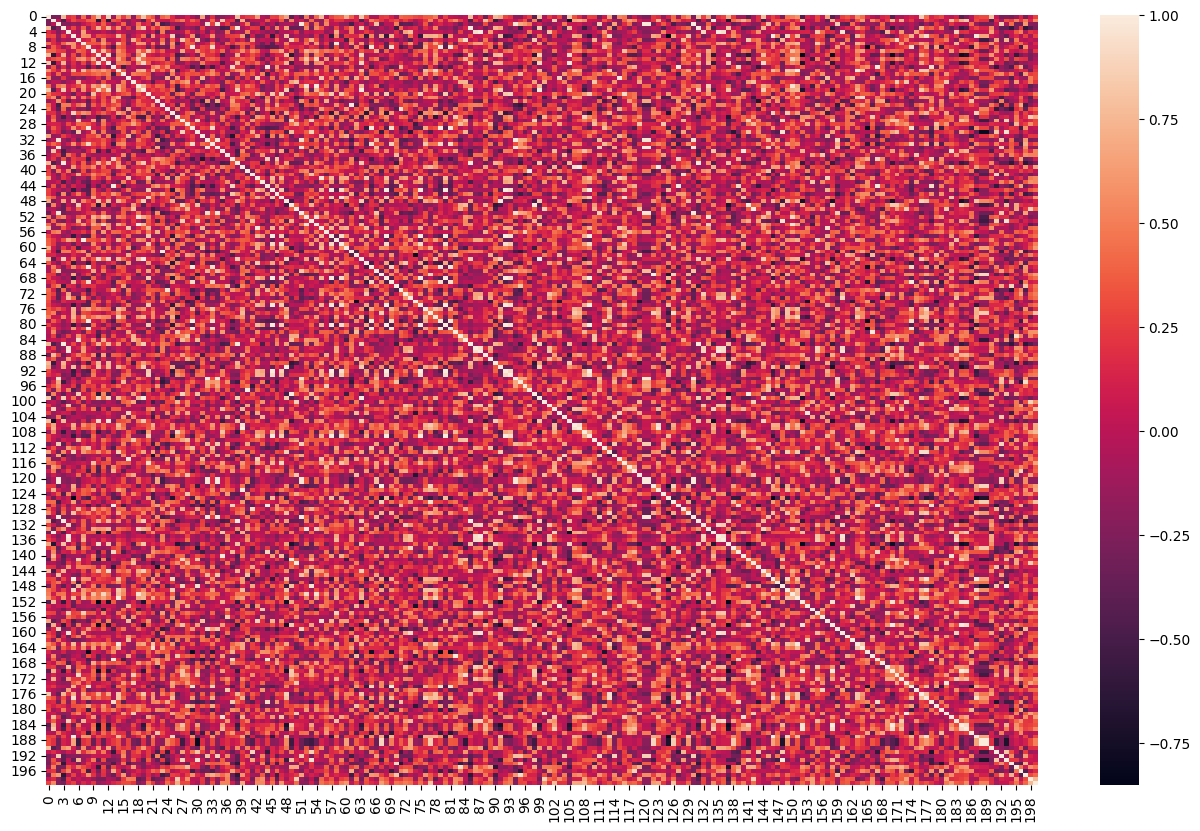

In [ ]:
# 200개만 상관 계수 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

이렇게 나온 상관계수를 이용해서 특정 방문 장소와 상관계수가 높은 장소만 뽑아주기

In [ ]:
import random

In [ ]:
# 용머리 해안과 비슷한 20개 장소 뽑기
visit_area = user_visit_area_rating.columns
visit_area_list = list(visit_area)
visit_nm_mode = random.choice(recommendation_df['VISIT_AREA_NM'].tolist())

In [ ]:
visit_nm_mode

'수산봉'

In [ ]:
coffey_hands = visit_area_list.index(visit_nm_mode)

In [ ]:
# coffey_hands와 가장 큰 상관 관계를 가지는 상위 10개의 VISIT_AREA_NM 출력
top_corr_indices = np.argsort(corr[coffey_hands])[::-1][1:11]  # coffey_hands를 제외하고 상위 10개 인덱스
top_visit_areas = [visit_area_list[i] for i in top_corr_indices]
print("coffey_hands와 가장 큰 상관 관계를 가지는 상위 10개의 VISIT_AREA_NM")
for area in top_visit_areas:
    print(area)

coffey_hands와 가장 큰 상관 관계를 가지는 상위 10개의 VISIT_AREA_NM
다이나믹메이즈 제주도성읍점
소정방폭포
지진옥외대피장소 강정체육공원
고살리숲길
안덕계곡
화순 곶자왈생태탐방숲길
화순금모래해수욕장
새로나분식
올레길 8코스(월평-대평 올레)
효명사


In [ ]:
top_visit_areas

['다이나믹메이즈 제주도성읍점',
 '소정방폭포',
 '지진옥외대피장소 강정체육공원',
 '고살리숲길',
 '안덕계곡',
 '화순 곶자왈생태탐방숲길',
 '화순금모래해수욕장',
 '새로나분식',
 '올레길 8코스(월평-대평 올레)',
 '효명사']

In [ ]:
visit_coord_df = visit_area_info[['X_COORD', 'Y_COORD','VISIT_AREA_NM']]

In [ ]:
visit_coord_df

,X_COORD,Y_COORD,VISIT_AREA_NM
0,126.63863,37.393064,송도센트럴파크
1,126.58133,33.300177,원앙폭포
2,126.923897,33.452317,광치기해변
3,126.591265,33.239076,소천지
4,126.327957,34.400734,쏠비치진도 인피니티풀
...,...,...,...
15985,126.5179076,33.51136992,서문공설시장
15986,126.9405375,33.45913497,성산일출봉
15987,126.2391575,33.39386608,협재해수욕장
15988,126.693832,33.43257409,산굼부리


In [ ]:
coord_list=[]

In [ ]:
coord_df = pd.DataFrame(columns=visit_coord_df.columns)

In [ ]:
#데이터 프레임에서 추천된 여행지들만 가져오기
for value in top_visit_areas:
    matching_rows = visit_coord_df.loc[visit_coord_df['VISIT_AREA_NM'] == value]
    coord_df = coord_df.append(matching_rows, ignore_index=True)

In [ ]:
#중복으로 나오는 것 삭제
coord_df = coord_df.drop_duplicates(subset=['VISIT_AREA_NM'])

In [ ]:
coord_df

,X_COORD,Y_COORD,VISIT_AREA_NM
0,126.785287,33.399158,다이나믹메이즈 제주도성읍점
2,126.577635,33.245226,소정방폭포
9,126.48622,33.234506,지진옥외대피장소 강정체육공원
10,126.5985212,33.31714447,고살리숲길
14,126.352583,33.257202,안덕계곡
25,126.331952,33.264043,화순 곶자왈생태탐방숲길
29,126.333589,33.240032,화순금모래해수욕장
48,126.5641753,33.24853765,새로나분식
49,126.413922,33.24462,올레길 8코스(월평-대평 올레)
63,126.5941584,33.32329739,효명사


In [ ]:
#추천된 여행지 경도 위도 저장
locations = [(row['X_COORD'], row['Y_COORD']) for index, row in coord_df.iterrows()]

In [ ]:
locations

[(126.785287, 33.39915757),
 (126.5776345, 33.24522641),
 (126.4862203, 33.23450646),
 ('126.5985212', '33.31714447'),
 (126.3525826, 33.25720217),
 (126.3319518, 33.26404269),
 (126.3335893, 33.24003243),
 ('126.5641753', '33.24853765'),
 (126.4139222, 33.24462042),
 ('126.5941584', '33.32329739')]

In [ ]:
locations

[(126.785287, 33.39915757),
 (126.5776345, 33.24522641),
 (126.4862203, 33.23450646),
 ('126.5985212', '33.31714447'),
 (126.3525826, 33.25720217),
 (126.3319518, 33.26404269),
 (126.3335893, 33.24003243),
 ('126.5641753', '33.24853765'),
 (126.4139222, 33.24462042),
 ('126.5941584', '33.32329739')]

#경로 추천

### 라이브러리

In [ ]:
!pip install ortools
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

### 좌표, 거리 함수

숙소 추천 완성되면 숙소좌표를 받아와서 distance matrix로 만들어줘야함


In [ ]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""
# float 형태로 변환
def convert_to_float_lodging(locations, loding_location_xy):
    locations.insert(0, loding_location_xy)
    locations = [(float(x), float(y)) for x, y in locations]
    return locations


#숙소 좌표 거리 행렬로 변환, solver에 int만 들어갈 수 있으므로 각 좌표에 1000을 곱한 후 반올림(결과에는 영향 없음)
def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = []
    for from_node in locations:
        row = []
        for to_node in locations:
            # Euclidean distance
            distance = math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
            # 1000 곱하기
            distance = round(distance * 1000)
            row.append(distance)
        distances.append(row)
    return distances
#solver에 들어갈 데이터 생성
def create_data_model(distances):
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = distances
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

#결과값 출력
def print_solution(manager, routing, solution):
    index = routing.Start(0)
    plan_output = "Route for vehicle 0:\n"
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Route distance: {route_distance}miles\n"


def main():
    locations_real = convert_to_float_lodging(locations, loding_location_xy )
    """Entry point of the program."""
    # Instantiate the data problem.
    distances = compute_euclidean_distance_matrix(locations_real)
    data = create_data_model(distances)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == "__main__":
    main()

Route for vehicle 0:
 0 -> 1 -> 4 -> 10 -> 5 -> 6 -> 7 -> 9 -> 3 -> 8 -> 2 -> 0

